In [12]:
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import model_selection, metrics, datasets, naive_bayes, preprocessing, pipeline
import matplotlib.pyplot as plt
from matplotlib import colors, patches
from IPython.core.interactiveshell import InteractiveShell


In [2]:
# 配置项
%config IPCompleter.greedy=True

# 这个要放到设置中文之前否则还是小方框
plt.style.use("seaborn")

# 指定默认字体 用来正常显示中文标签
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决保存图像是负号'-'显示为方块的问题
plt.rcParams['axes.unicode_minus'] = False

# #全部行都能输出
InteractiveShell.ast_node_interactivity = "all"

In [9]:
data = datasets.load_iris()
data, target = data.data, data.target
iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'

df = pd.DataFrame(data, columns=iris_feature)
df['target'] = target
df.head(10)

,花萼长度,花萼宽度,花瓣长度,花瓣宽度,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [25]:
x, y = df.iloc[:, :2], df.iloc[:, -1]
gnb = pipeline.Pipeline([
    ('sc', preprocessing.StandardScaler()),
    ('clf', naive_bayes.GaussianNB())
])
gnb.fit(x, y)
gnb.score(x, y)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('clf', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)

0.78

Text(0.5, 0, '花萼长度')

Text(0, 0.5, '花萼宽度')

Text(0.5, 1.0, 'GaussianNB对鸢尾花数据的分类结果')

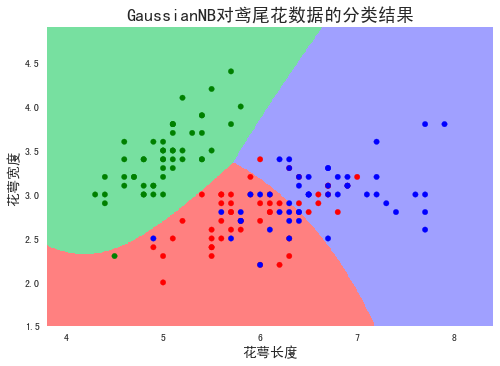

In [35]:
cm_light = colors.ListedColormap(['#77E0A0', '#FF8080', '#A0A0FF'])
cm_dark = colors.ListedColormap(['g', 'r', 'b'])

# 画图 先取出第一列 第二列特征 构造网格 构造测试数据
x1_min, x1_max = df.iloc[:, 0].min() - 0.5, df.iloc[:, 0].max() + 0.5
x2_min, x2_max = df.iloc[:, 1].min() - 0.5, df.iloc[:, 1].max() + 0.5
axis_x = np.linspace(x1_min, x1_max, 500)
axis_y = np.linspace(x2_min, x2_max, 500)
axis_x, axis_y = np.meshgrid(axis_x, axis_y)
x_test = np.stack([axis_x.ravel(), axis_y.ravel()], axis=1)
y_hat = gnb.predict(x_test).reshape(axis_x.shape)
plt.pcolormesh(axis_x, axis_y, y_hat, cmap=cm_light)
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], s=30, marker='o', c=y, cmap=cm_dark)

plt.xlabel(u'花萼长度', fontsize=14)
plt.ylabel(u'花萼宽度', fontsize=14)
# plt.xlim(x1_min, x1_max)
# plt.ylim(x2_min, x2_max)
plt.title(u'GaussianNB对鸢尾花数据的分类结果', fontsize=18)
plt.show()